Submitted for evaluation by Tejas Pandey (tejas.pandey@icloud.com)

# Part 1

## Python Coding and Data Set

In [1]:
# Import pandas, matplotlib and seaborn for plotting and sklearn for Machine Learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
def import_data_file(filepath, header_filepath):
    '''
    Reads in a file with a seperate header file and returns a dataframe
    :filepath: String
    :header_filepath: String 
    :return: Dataframe
    '''
    
    # Read in csv file
    df = pd.read_csv(filepath, header=None)
    
    # Read in header file
    with open(header_filepath, 'r') as file:
      
        # Extract the header lines
        columns = [line.strip().lower() for line in file]
        
    # Set the columns of the dataframe as the extracted column    
    df.columns = columns
    
    return df

In [3]:
# Read in the raw data and print out the first 5 rows
df_raw_data = import_data_file('breast-cancer.csv', 'field_names.txt')
df_raw_data.head()

,id,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Check for null values

A null value is a missing value in our dataset. To keep out analysis simple, we will leave out the rows in our imported dataset that have any missing values

In [4]:
# Check if there are any nulls in the columns and check if any are greater than 0
df_raw_data.isna().sum() > 0

id                            False
diagnosis                     False
radius_mean                   False
radius_sd_error               False
radius_worst                  False
texture_mean                  False
texture_sd_error              False
texture_worst                 False
perimeter_mean                False
perimeter_sd_error            False
perimeter_worst               False
area_mean                     False
area_sd_error                 False
area_worst                    False
smoothness_mean               False
smoothness_sd_error           False
smoothness_worst              False
compactness_mean              False
compactness_sd_error          False
compactness_worst             False
concavity_mean                False
concavity_sd_error            False
concavity_worst               False
concave_points_mean           False
concave_points_sd_error       False
concave_points_worst          False
symmetry_mean                 False
symmetry_sd_error           

### Eyeball the numerical variables
By calling the describe method on the dataframe, we can eyeball to see the distributions of the numerical data variables to see if anything needs to be scaled or checked for outliers

In [5]:
df_raw_data.describe()

,id,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Compare the mean and median for smoothness and compactness

Let's create functions to pull out the mean and medians for different features split by our target i.e. diagnosis. It is helpful to recall that M represents Malignant Tumours and B represent Benign Tumors

In [6]:
def compare_metrics(df, group_by_column, metric_column, grouping_function):
    '''
     For an input dataframe, group by a column then apply a grouping function to the metric_column
    
    :df: Dataframe
    :group_by_column: String
    :metric_column: String
    :grouping_function: String 'mean' or 'median'
    '''
    if grouping_function == 'mean':
        metric = df.groupby(group_by_column)[metric_column].mean()
    elif grouping_function == 'median':
        metric = df.groupby(group_by_column)[metric_column].median()    
    
    print(f'''{metric_column} : {grouping_function}
        {metric}
    ''')

In [7]:
compare_metrics(df_raw_data, 'diagnosis', 'smoothness_mean', 'mean')
compare_metrics(df_raw_data, 'diagnosis', 'smoothness_mean', 'median')

smoothness_mean : mean
        diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64
    
smoothness_mean : median
        diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64
    


For Malignant tumours, the mean smoothness is much higher than the median smoothness. This implies that there is a fat tail in the smoothness distribution, i.e a large number of malignant tumours have a high value for smoothness

In [8]:
compare_metrics(df_raw_data, 'diagnosis', 'compactness_mean', 'mean')
compare_metrics(df_raw_data, 'diagnosis', 'compactness_mean', 'median')

compactness_mean : mean
        diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64
    
compactness_mean : median
        diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64
    


Similarly for Malignant tumours, the mean compactness is much higher than the median compactness implying the same relationship as compactness.

In [9]:
def get_bootstrap_samples(data, num_samples, with_replacement):
    '''
    Create a sampling of data from a dataset
    :data: Dataframe
    :num_samples: Integer number of samples to be taken
    :with_replacement: Boolean to take samples with or without replacement
    '''
    
    samples = data.sample(num_samples, replace=with_replacement)
    
    return samples

In [10]:
get_bootstrap_samples(df_raw_data, 50, True).head()

,id,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
515,916221,B,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.16240,0.08542,0.3060,0.06783
211,8810528,B,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,...,13.30,24.99,85.22,546.3,0.1280,0.1880,0.14710,0.06913,0.2535,0.07993
82,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.64760,0.28670,0.2355,0.10510
36,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.51860,0.14470,0.3591,0.10140
150,871001501,B,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,...,14.16,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435


## Exploratory Analysis

### Create a copy and encode the categorical target

Before we begin the exploratory analysis, we must create a copy of our raw dataset to ensure that we can pull back the data if needed and as our classification algortihms need a number to represent the class it is trying to predict, we must encode the M and B in the diagnosis column to 1 and o

In [11]:
# Create a ccopy of the raw data
df_encoded = df_raw_data.copy()
# Encode the diagnosis
df_encoded['diagnosis'] = df_encoded.apply(lambda r: 1 if r['diagnosis'] == 'M' else 0, axis=1)

In [12]:
def generate_correlation_matrix(data, threshold, column):
    '''
    Generates a correlation heatmap and returns 
    :data:
    :threshold: Correlation threshold incase of a large number of features
    :column: String column to find correlation around
    :return: List
    '''
    corr = data.corr()
    
    correlated_cols = (corr[column] > threshold) | (corr[column] < -1*threshold)
    
    corr = corr.loc[correlated_cols, correlated_cols]

    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
    
    return list(correlated_cols.index)

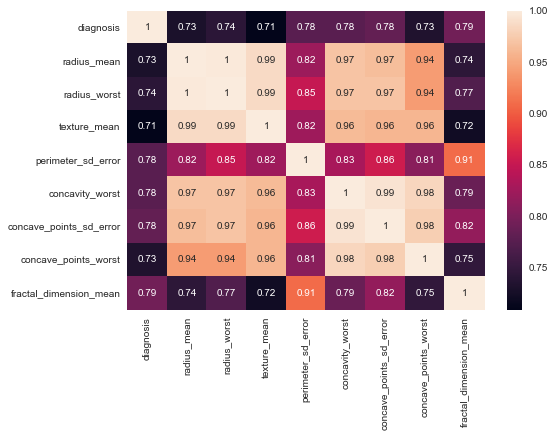

In [13]:
features = generate_correlation_matrix(df_encoded, 0.70, 'diagnosis')

As we can see from the above heatmap, there are a number of features that have a strong positive correlation with our diagnosis target

## Modeling

In [14]:
# Grab only the features from the dataframe that have a strong correlation with our target
df_features = df_encoded.copy()[features]
df_features.head()

,id,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Set the X to be the features and exclude the target and the id column and set the Y to be the diagnosis columns
X = df_features[list(set(features) - set(['id', 'diagnosis']))]
y = df_features['diagnosis']

In [18]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 25)

# Scale the X for the logistic regression to ensure that it converges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

As a benchmark, I like to use the simplest classifier, the **Logistic Regression** and then a **Random Forest** Classifier.

The Logistic Regression works well with simple linear data, is fast and easy to use. It doesn't scale well with higher order features but has the distinct advantage of not overfitting. This would be helpful in ensuring that we don't get a lot of False Positives. It is a great starting choice for a simple two class problem like the breast cancer dataset.

The Random Forest is another easy to use classifier that has distinct advantages with the features that we see. From the correlation heatmaps, it appears that many features are correlated with each other as well. The Random Forest classifier hand;es this well. Although prone to overfitting, It can be a quick and easy way to handle noisy data.

In [19]:
# Create the classifiers
logistic_regression = LogisticRegression();
random_forest=RandomForestClassifier();

# Fit the data
logistic_regression.fit(X_train_scaled, y_train)
random_forest.fit(X_train, y_train)

# Generate predictions
logistic_regression_y_pred = logistic_regression.predict(X_test_scaled)
random_forest_y_pred = random_forest.predict(X_test)

In [20]:
print(f'''
ACCURACY
---
Logistic Regression: {round(100 * metrics.accuracy_score(y_test, logistic_regression_y_pred), 2)}%
Random Forest: {round(100 * metrics.accuracy_score(y_test, random_forest_y_pred), 2)}%
''')


ACCURACY
---
Logistic Regression: 96.49%
Random Forest: 93.86%



Interstingly the Logsitic Regression handily beats out the Random Forest however both do fairly well!

In [21]:
def plot_feature_importance(importance, index, label):
    '''
    For an array of coefficients and labels, plot a bar plot
    :importance: List like object of feature weights
    :index: List like object of index labels
    :label: String label for the chart
    '''
    fig, ax = plt.subplots(figsize=(10,5));
    sns.barplot(importance, index, ax=ax)
    ax.set_xlabel("Features");
    ax.set_ylabel("Importance");
    ax.set_title(label);

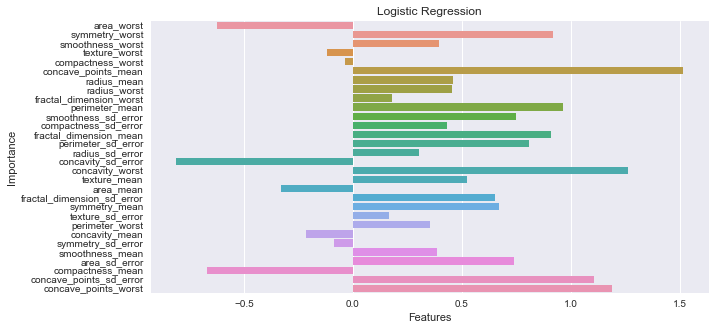

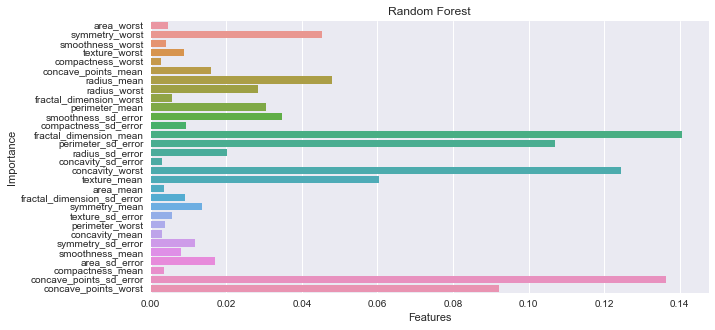

In [22]:
plot_feature_importance(list(logistic_regression.coef_[0]), X_train.columns, 'Logistic Regression')
plot_feature_importance(random_forest.feature_importances_, X_train.columns, 'Random Forest')

The **Logistic Regression** has the following top 3 features:
1. concave_points_mean
2. concavity_worst
3. smoothness_sd_error

The **Random Forest** has the following top 3 features:
1. concavity_worst
2. concave_points_sd_error
3. perimeter_sd_error

## Explanation

### Technical Explanation
#### Limitations and Further Steps

This analysis is ofcourse quite simplified and we took the defaults for the model. The first way to fine tune these models would be to run a **Grid Search** to find the optimal hyperparameters, although our results are fairly good.

Another analysis would be to look at F2-Scores, Recall and Precision. In a senstive health issue detection program, one would aim to have a minimal of False Positives and False Negatives, especially False Negatives as a missed cancer diagnosis can be fatal. Tuning the hyperparamters to optimize for this would be a logical next step.

### Non Technical Explanation

We created mathematical models that looked at previously collected data about the size and shape of breast cancer tumours in order to figure out what characteristics of a tumour make it likely to be a benign (non harmful) or malignant (harmful) tumour.

We determined that a few measures of the shape of a tumour can actually tell us with a fairly highlikelyhood whether a tumour is malginant or not. Some of those measures include concave_points_mean and concavity_worst

# Part 2

## Submission 1

```python
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())
```

- Imported LinearRegression from sklearn. It should be imported from `sklearn.linear_model`
- Imported cross_val_score from sklearn.cross_validation. It should be imported from `sklearn.model_selection`
- These lines `from sklearn.cross_validation import cross_val_score` and `from sklearn.cross_validation import train_test_split` can be consolidated to `from sklearn.cross_validation import cross_val_score, train_test_split`
- There is no point in running a cross_val_score with `cv=1`, you can use `model.fit()` and `model.predict()` instead if just using a single run or increase cv to a higher value
- `x1` and `x2` are non standard variable names
- No need to import `train_test_split()` if its not being used
- Avoid ambigious variable names like `d`
- Think about scaling your features using a scalar? Would it give better results?
- Only 1 feature is being used to predict the data when there are more features in the dataset. More features will better help in predicting the data

## Submission 2

```python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

```

- Imported cross_val_score from sklearn.cross_validation. It should be imported from `sklearn.model_selection`
- The `X` and `y` are incorrect. `X` is the feature set and `y` is the dependent variable/target
- Only 1 feature is being used to predict the data when there are more features in the dataset. More features will better help in predicting the data